# Project to simulate a data set using numpy.random

### Introduction
The underrepresentation of women at management level in third-level institutions is an international problem. In 2015 in Ireland 81% of professorial positions were held by men and, while women represented 62% of non-academic staff, men represented 72% of the highest paid non-academic staff. While there are currently 2 female presidents of Institutes of Technology in Ireland, there has never been a female university president. This issue was brought to the fore in the media when four academics from NUIG took a case against the University alleging gender discrimination. This followed the landmark case taken by Dr Micheline Sheehy Skeffington against NUIG in 2014. Dr Sheehy Skeffington won her case against the university when the Equality Tribunal ruled that she was not promoted to senior lecturer because of her gender. The ruling described the university’s interview process as “ramshackle” and noted that one of the men promoted was not even eligible to apply. In light of this I have decided to look at the gender breakdown at senior management level in Galway Mayo Institute of Technology (GMIT) to see if there is a similar pattern.      

### Process  

I will look at the following variables:   
Age   
Qualification   
Years of Experience   
Grade   
Gender      

The age variable will be a non-negative real number between 25 & 66.
The Qualification variable will be a real number with one of 3 different values: 8, 9, 10, to represent levels on the National Framework of Qualifications, (Level 8 = Honours Degree, Level 9 = Masters Degree, Level 10 = PhD)   .
The years of experience variable will be a non-negative real number, and will be based on age and qualification.
The Grade variable will be a categorical variable with one of 7 different values: Assistant Lecturer, Lecturer, Senior Lecturer 1, Senior Lecturer 2, Senior Lecturer 3, Registrar, President
The Gender variable will be either male or female
The determinant of whether a staff member has reached senior management level will be their Grade - those at SL2, SL3, Registrar & President will be considered at Senior Management level
Only staff categorised as Academic will be considered in this project.  
I will use the HEA publication 'Higher Education Institutional Staff Profiles by Gender', July 2018 to get the current statistics for gender breakdown in GMIT. This publication tells me that as at July 2018 46% of Academic staff in GMIT were female, and 54% male.  
I will look at statistics on qualifications provided by GMIT, and use a uniform distribution with certain parameters as described further on to generate age data.   
Years of experience will be a calculation based on age & qualification, and Grade will be randomly assigned using current proportions as at July 2018 as published in the HEA document referenced above. 

In [5]:
#Import pandas & numpy.
import pandas as pd
import numpy as np
# Set the seed so that the numbers can be reproduced.
np.random.seed(0)  

Pandas is a software library for data maniupulation & analysis.    
Numpy is a python library useful for large, multi-dimensional arrays & matrices, along with functions to operate on arrays. Numpy.random is part of the numpy library and is what I will use to generate random data to simulate my dataframe.   
np.random.seed sets the 'seed' for the random data. If the same seed is set the same numbers are generated each time. Changing the seed means a different set of numbers is generated.  

### The Dataset

In [6]:
#Insert age, gender & qualification columns to dataframe
gender = ['male', 'female']
grade = ['Assistant Lecturer', 'Lecturer', 'Senior Lecturer 1', 'Senior Lecturer 2', 'Senior Lecturer 3', 'Registrar', 'President']
df = pd.DataFrame({'Age': np.random.randint(25,66,450),
                   'Gender': np.random.choice(gender, 450,p=[0.54, 0.46]), 
                   'Grade': np.random.choice(grade, 450, p=[.1573, .7584, .0225, .0393, .0169, .0028, .0028])})

#Function to assign qual depending on age, i.e. <27 cannot hold PhD
def qual(row):

                if row['Age']>= 27:

                    return np.random.choice (np.arange (8,11), p=[.62, .21, .17])
                
                else: 
                    
                    return np.random.choice (np.arange (8,10), p =[.666, .334])
                                  
qual =df.apply (lambda row: qual(row),axis=1)
df['Qualification'] = qual

#Function to determine experience based on age & qual
def exp(row):

                if row['Qualification']== 10:

                    return row['Age']-27
            
                elif row['Qualification']== 9:

                    return row['Age']-23
                
                elif row['Qualification']== 8: 
                    
                    return row['Age']-22
                                  
exp =df.apply (lambda row: exp(row),axis=1)
df['Experience'] = exp
df



,Age,Gender,Grade,Qualification,Experience
0,25,female,Lecturer,8,3
1,28,male,Lecturer,8,6
2,28,female,Lecturer,9,5
3,64,female,Senior Lecturer 1,8,42
4,34,female,Lecturer,8,12
5,44,male,Lecturer,8,22
6,46,male,Assistant Lecturer,8,24
7,61,female,Senior Lecturer 1,10,34
8,48,male,Lecturer,8,26
9,31,male,Lecturer,8,9


### Procedure for generating variables   

#### Age:
I used the function random.randint, a discrete uniform distribution, to generate ages of academic staff, with a minimum age of 25 and a maxiumum age of 66. It is appropriate to use this type of distribution when you have a minimum & maximum value, but no insight into where within this range a particular value might fall. I made the assumption, based on minimum requirements for academic posts, that the youngest one can be appointed is 25, and currently one must retire on 31st August after 65th birthday, making 66 the maximum age.  
#### Gender: 
I used np.random.choice to generate the data on gender, giving a 46%, 54% female/male breakdown as per the July 2018 HEA Institutional Staff Profiles by Gender report. This function generates a random sample from a given one dimensional array, the parameters entered being gender, size of output, and probabilities associated with each entry of gender, i.e. 54% male, 46% female.   
#### Qualification:   
Initially I had used a random normal distribution to assign qualification, however having ran the code I realised that I need to look at the relationship between age & qualification, as, for example, a 25 year old staff member is unlikely to hold a PhD, given that the academic minimum requirements are a qualification to at least Level 8 plus three years experience. A Level 8 qualification generally takes 3/4 years, a Masters 1 year and a PhD at least 4 years. I therefore made the assumption that the youngest a PhD holder could be is 27. The IUA report on PhD students in the Universities found that the average age of a PhD student is 26 years (data collected in 2008), and a 1997 OECD report found that the typical graduation age from PhDs in Ireland is 24-27 years (Organization for Economic Co-operation and Development, Education at a Glance: OECD Indicators, 1997).   
I then had to create an if function to look at the age column, and if that was less than or equal to 27, randomly choose either Level 8 or Level 9 based on the current proportions of academic staff holding those qualifications - after researching the GMIT staff data I discovered that currently 21% of academic staff hold a PhD, 62% hold a Master's Degree, and the remainder an Honours Degree.  I applied the same function to those in the age column that were greater than 27, randomly choosing either a Level 8, 9 or 10 again using the current proportions of GMIT staff holding these qualifications.    
#### Grade   
To assign Grade I used the same function as for Gender; np.random.choice. This function was used as it allows you to assign probabilities for the various outcomes. I assigned seven variables to incorporate the current academic grades - Assistant Lecturer, Lecturer, Senior Lecturer 1, Senior Lecturer 2, Senior Lecturer 3, Registrar, President. The breakdown was again taken from the HEA publication 'Higher Education Institutional Staff Profiles by Gender'.    
#### Years of Experience    
This is a calculated variable based on age & qualifications. I took the age for each row, and if the 'Qualification' column was Level 10 subtracted 27 (18 years as school leaving age plus 4 years for completion of primary degree, 1 year for Masters & 4 years for PhD). Similarly if the 'Qualification' column was Level 9, subtracted 23, and Level 8 subtracted 22, using an 'if' statement and Pandas apply function to apply the calculation to each row. 

In [12]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [68]:
#Show histogram based on Grade & Gender, just for Senior Management Grades
#First drop non-Senior Management grades
ndf = df.drop(['Lecturer', 'Assistant Lecturer', 'Senior Lecturer 1'])
ndf


,Age,Gender,Qualification,Experience
Grade,,,,
Senior Lecturer 2,60,male,9,37
Senior Lecturer 3,25,female,8,3
Senior Lecturer 2,28,male,8,6
President,38,female,10,11
Senior Lecturer 3,44,female,9,21
Senior Lecturer 2,38,female,8,16
Senior Lecturer 2,65,male,8,43
Senior Lecturer 3,29,male,8,7
Senior Lecturer 3,49,female,9,26


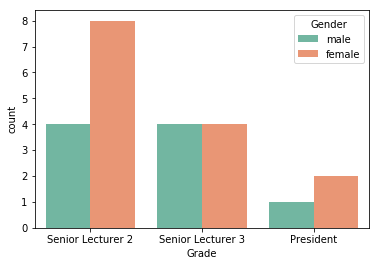

In [75]:
#Display histogram by Grade & Gender
ndf['Grade'] = ndf.index
sns.countplot(x='Grade', hue='Gender',data= ndf, palette = "Set2")

Interestingly, the histogram above shows that based on the simulated data, if you take senior management academic grades as a whole, there doesn't appear to be an underrepresentation of women at senior management level in GMIT. There are almost double the number of female Senior Lecturer 2s (Heads of Department) as there are male, an equal number of Senior Lecturer 3s (Heads of School). The data for President & Registrar is slightly misleading, as each Institute generally has one of each of these Grades, and my simultation didn't show any Registrar, and three Presidents!

### References
https://nonpartisaneducation.org/Review/Resources/Int__lHigherEd_AppendixA.pdf   
http://www.iua.ie/wp-content/uploads/2013/08/IUS-01-2013-Report-on-PhD-Students.pdf   
http://hea.ie/assets/uploads/2018/01/Higher-Education-Institutional-Staff-Profiles-by-Gender-2018.pdf   
http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm   
https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html   
http://hea.ie/policy/gender/   
https://www.irishtimes.com/news/crime-and-law/courts/high-court/discrimination-action-involving-female-nuig-lecturers-resolved-1.3576043
